**Import Libraries**

In [16]:
import pandas as pd
import numpy as np

**Import dataset**

In [18]:
data_df = pd.read_csv(r"C:\Users\elsaw\OneDrive\Bureau\mult_linear_reg.csv")

In [19]:
data_df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


**Define x and y**

In [20]:
# excluding the last column
x = data_df.drop(['PE'], axis=1).values
# we just need the last column
y = data_df['PE'].values

In [21]:
print(x)

[[  14.96   41.76 1024.07   73.17]
 [  25.18   62.96 1020.04   59.08]
 [   5.11   39.4  1012.16   92.14]
 ...
 [  31.32   74.33 1012.92   36.48]
 [  24.48   69.45 1013.86   62.39]
 [  21.6    62.52 1017.23   67.87]]


In [23]:
print(y)

[463.26 444.37 488.56 ... 429.57 435.74 453.28]


**Split the dataset in training set and test set**

In [25]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

test_size indicates how much percentage we give to our training dataset (70%) and test dataset (30%)

random_state=0 : our result remain the same every time we run it

**Train the model on the training set**

In [27]:
from sklearn.linear_model import LinearRegression
ml = LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

**Predict the test set results**

In [28]:
y_pred = ml.predict(x_test)
print(y_pred)

[431.40245096 458.61474119 462.81967423 ... 432.47380825 436.16417243
 439.00714594]


In [30]:
#the first row
ml.predict([[14.96,41.76,1024.07,73.17]])

array([467.34820092])

The actual value is 463.26 so it's close enough.

**Evaluate the model**

In [33]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9304112159477683

r2_score is 93% which is a good score!

**Plot the results**

Text(0.5, 1.0, 'Actual vs Predicted')

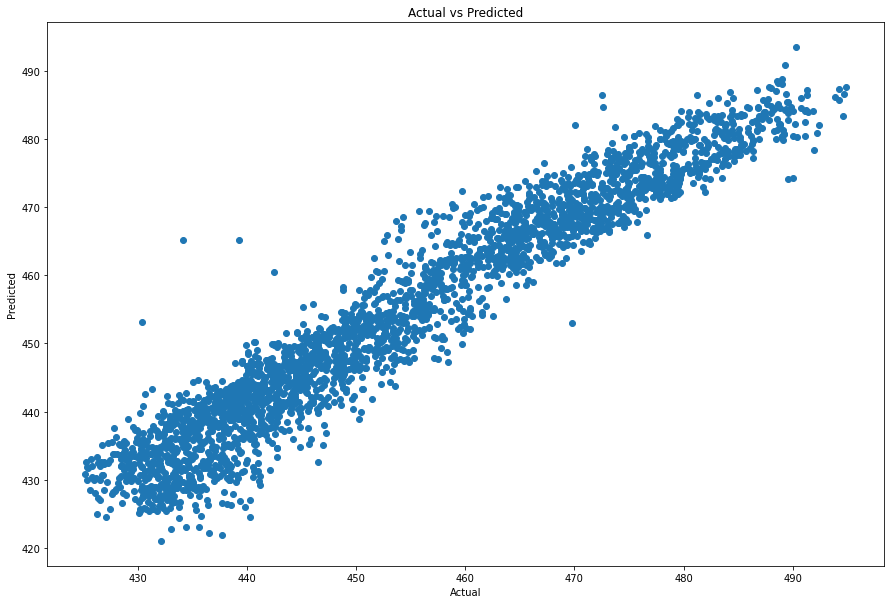

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

Actual and predicted values are close! They are only a few exceptions (the isolated points).

**Predicted values**

In [39]:
pred_y_df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred, 'Difference': y_test - y_pred})
pred_y_df[0:20]

,Actual,Predicted,Difference
0,431.23,431.402451,-0.172451
1,460.01,458.614741,1.395259
2,461.14,462.819674,-1.679674
3,445.90,448.601237,-2.701237
4,451.29,457.879479,-6.589479
5,432.68,429.676856,3.003144
6,477.50,473.017115,4.482885
7,459.68,456.532373,3.147627
8,477.50,474.342524,3.157476
9,444.99,446.364396,-1.374396
